# Pytorch introduction

Credits are given to the official Introduction to Pytorch from which some parts of this notebook were taken: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

## Pytorch basics

First, we’ll import pytorch.

In [4]:
import torch

Let’s see a few basic tensor manipulations. First, just a few of the ways to create tensors:

In [4]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we create a 5x3 matrix filled with zeros, and query its datatype to find out that the zeros are 32-bit floating point numbers, which is the default PyTorch. \
What if you wanted integers instead? You can always override the default:

In [5]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


You can see that when we do change the default, the tensor helpfully reports this when printed. \
It’s common to initialize learning weights randomly, often with a specific seed for the pseudo random number generator for reproducibility of results:

In [6]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2) # returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor:

In [7]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Here’s a small sample of the mathematical operations available:

In [11]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.sin(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.1770,  0.3677],
        [-0.8595,  0.0210]])

Absolute value of r:
tensor([[0.1770, 0.3677],
        [0.8595, 0.0210]])

Inverse sine of r:
tensor([[-0.1761,  0.3595],
        [-0.7575,  0.0210]])

Average and standard deviation of r:
(tensor(0.5167), tensor(-0.1619))

Maximum value of r:
tensor(0.3677)


There are also many other useful commands. To give a few examples:

In [5]:
# Instead of uniformly distributed random numbers, there are also other random number generators available, for example:
ints = torch.randint(0, 10, (10,))
print('Random integers:')
print(ints)
gaussians = torch.randn(10)
print('Random numbers from standard normal distribution:')
print(gaussians)

# Instead of getting the maximum or minimum value, it is often useful to get the index of the maximum or minimum value:
r = torch.rand(10)
print('\nA random vector, r:')
print(r)
print('Indice of the maximum value in r:')
print(torch.argmax(r))
print('Indice of the minimum value in r:')
print(torch.argmin(r))

# create regularly spaced numbers between two values
linspace = torch.linspace(1, 10, 10)
print('\nRegularly spaced numbers between 1 and 10:')
print(linspace)

# numpy arrays can be converted to tensors and vice versa
import numpy as np
a = np.array([1, 2, 3])
t = torch.from_numpy(a) # shares memory with numpy array, as opposed to using 'torch.tensor(a)'
print('\nNumpy array:')
print(a)
print('Tensor from numpy array:')
print(t)
print('Numpy array from tensor:')
print(t.numpy())

Random integers:
tensor([0, 6, 5, 1, 2, 0, 5, 7, 2, 9])
Random numbers from standard normal distribution:
tensor([ 0.2125,  1.1689, -0.8668, -0.4230, -0.9821,  1.5950,  0.1350, -0.6622,
        -1.4732, -2.0467])

A random vector, r:
tensor([0.3753, 0.2688, 0.4177, 0.4216, 0.8182, 0.8039, 0.2199, 0.9364, 0.8576,
        0.3913])
Indice of the maximum value in r:
tensor(7)
Indice of the minimum value in r:
tensor(6)

Regularly spaced numbers between 1 and 10:
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Numpy array:
[1 2 3]
Tensor from numpy array:
tensor([1, 2, 3])
Numpy array from tensor:
[1 2 3]


# Pytorch dimensions

Just as numpy, Pytorch can easily represent multi-dimensional objects such as images:

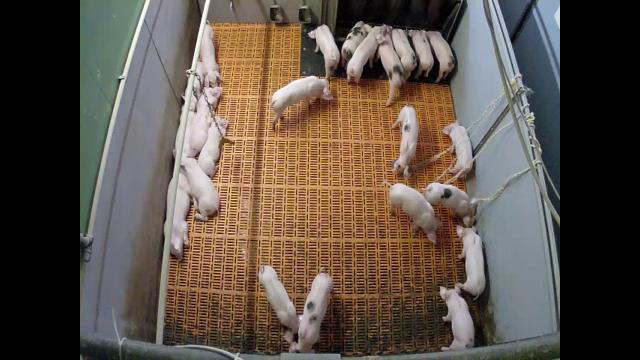

Tensor shape: torch.Size([3, 360, 640])
Tensor type: torch.float32


In [14]:
from PIL import Image # PIL is a Python Imaging Library
import torchvision.transforms as transforms # torchvision offers useful tools for image processing
import matplotlib.pyplot as plt
from IPython.display import display

# Open the image file
image_path = '/user/henrich1/u12112/repos/DaNuMa2024/data/raw_data/introduction/test_image.jpg'
image = Image.open(image_path)
display(image)

# Convert to tensor
transform = transforms.ToTensor()
tensor_image = transform(image)
print(f'Tensor shape: {tensor_image.shape}')
print(f'Tensor type: {tensor_image.dtype}')

# Pytorch with gpu

In [ ]:
torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Pytorch modules (model components)

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [ ]:
torch.cat
torch.tensor()
torch.from_numpy()

# many functions also available as methods